In [1]:
# Importing necessary libraries
import numpy as np  # For array handling and numerical operations
import pandas as pd  # For creating DataFrames and data manipulation
import matplotlib.pyplot as plt  # For basic data visualization
import seaborn as sns #for basic plot as well


In [2]:
#importing the cleaned data set which i have saved in d_data_cleaning file
df=pd.read_csv("Covid-19 countrywise cleand dataset.csv")
print(df.head()) # checking the data set successfully imported or not

           country      cases    death           region  moralityrate
0   United States   111820082  1219487   North America        9169.44
1           India    45035393   533570            Asia        8440.39
2          France    40138560   167642          Europe       23943.02
3         Germany    38828995   183027          Europe       21214.90
4          Brazil    38743918   711380   South America        5446.30


# Exploratory Data Analysis(EDA)

In [3]:
#summery statistics of numerical column
print(df.describe())

              cases         death  moralityrate
count  2.300000e+02  2.300000e+02  2.300000e+02
mean   3.064147e+06  3.048122e+04  5.392028e+04
std    1.004108e+07  1.094512e+05  4.271755e+05
min    9.000000e+00  0.000000e+00  0.000000e+00
25%    2.674375e+04  1.882500e+02  5.435305e+03
50%    2.084015e+05  1.999000e+03  1.065848e+04
75%    1.352372e+06  1.436950e+04  2.120805e+04
max    1.118201e+08  1.219487e+06  6.449747e+06


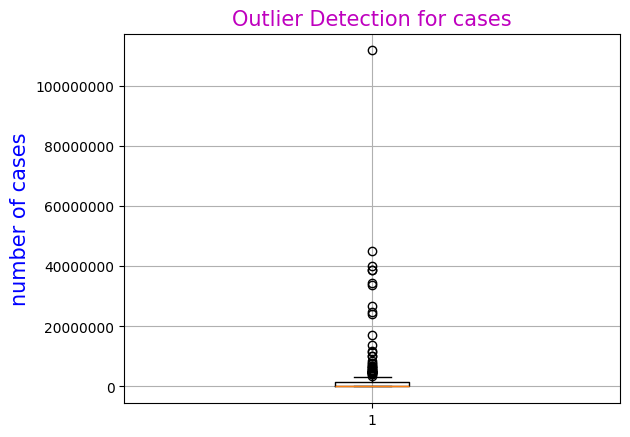

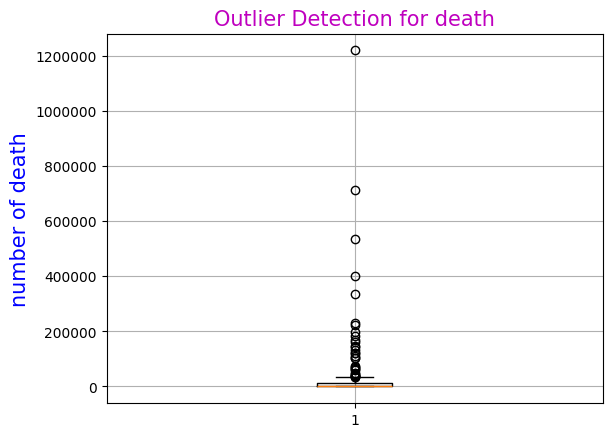

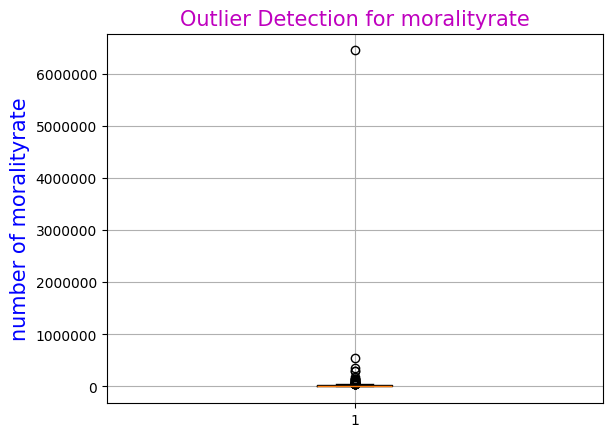

In [4]:
#Exploring the outlier detection using boxplot
col=["cases","death","moralityrate"]
for i in col:
    plt.boxplot(df[i])  
    plt.title(f"Outlier Detection for {i}",color="m", size=15)  # Add a title
    plt.xlabel("")  # Label the x-axis
    plt.ylabel(f"number of {i}",color="b", size=15)  # Label the y-axis
    plt.grid(True)  # Add grid for better readability
    plt.ticklabel_format(style="plain", axis="y")  # Formatting y-axis labels in plain numbers
    plt.show()

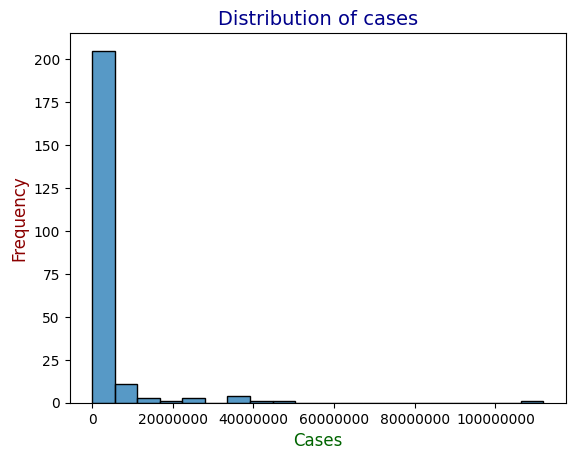

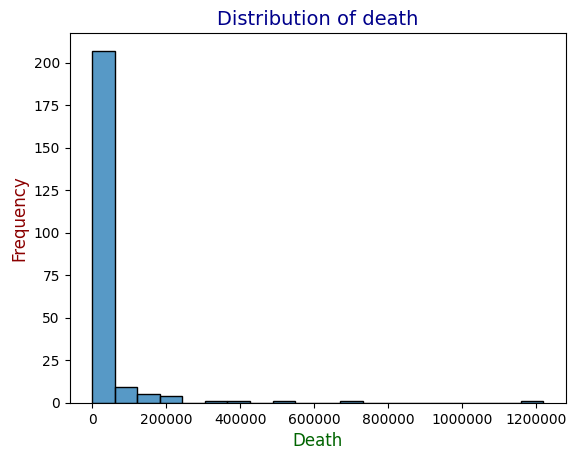

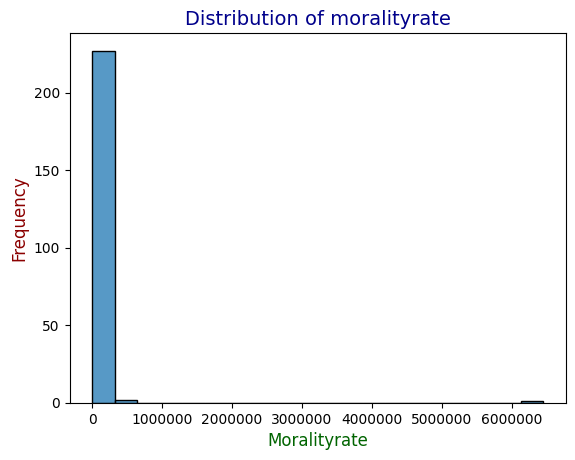

In [5]:
#Exoloring the distibution  of case ,death and morality rate using histogram
col=["cases","death","moralityrate"]
for column in col:
    sns.histplot(df[column], bins=20)  # Create the histogram with kernel density estimation (kde)
    plt.title(f"Distribution of {column}", size=14, color="darkblue")  # Set the title with color
    plt.xlabel(column.capitalize(), size=12, color="darkgreen")  # Set the x-axis label with color
    plt.ylabel("Frequency", size=12, color="darkred")  # Set the y-axis label with color
    plt.ticklabel_format(style="plain", axis="x")
    plt.show()  # Display the plot

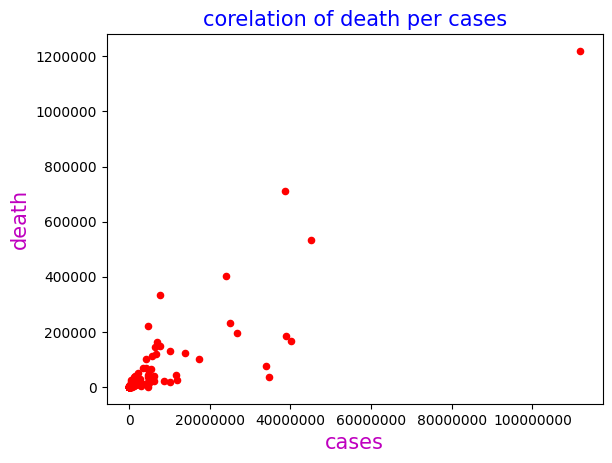

In [6]:
#Exploring the co-relation analysis cases per death
plt.scatter(df["cases"],df["death"],color="r",s=20)
plt.title("corelation of death per cases",color="b", size=15)
plt.xlabel("cases",color="m", size=15)
plt.ylabel("death",color="m", size=15)
plt.ticklabel_format(style="plain", axis="x")
plt.ticklabel_format(style="plain", axis="Y")
plt.show()

In [7]:
#Deriving Totalcases,death and verage morality rate region wise
region_summery=df.groupby("region").agg({"cases":"sum","death":"sum","moralityrate":"mean"})
print(region_summery)

                         cases    death   moralityrate
region                                                
 Africa               12860924   258892   10656.737931
 Asia                221500977  1553675  159854.416600
 Australia/Oceania    14895771    33015   94458.651500
 Europe              253406198  2101824   20116.330833
 North America       131889132  1695941   21464.429487
 South America        70200879  1367332    7038.072143
no region                    9        2     450.000000


In [8]:
# Exploring top 10 countries by highest cases, deaths, and mortality rate
# Sorting the data by 'cases' column in descending order and selecting the top 10 countries
top_case = df[["country", "cases"]].sort_values(by="cases", ascending=False).head(10).reset_index(drop=True)
print("Top 10 countries with most cases are:")
print(top_case)

Top 10 countries with most cases are:
                       country      cases
0               United States   111820082
1                       India    45035393
2                      France    40138560
3                     Germany    38828995
4                      Brazil    38743918
5                 South Korea    34571873
6   Japan (+Diamond Princess)    33804284
7                       Italy    26723249
8              United Kingdom    24910387
9                      Russia    24124215


In [9]:
# Sorting the data by 'death' column in descending order and selecting the top 10 countries
top_death = df[["country", "death"]].sort_values(by="death", ascending=False).head(10).reset_index(drop=True)
print("Top 10 countries with most deaths are:")
print(top_death)

Top 10 countries with most deaths are:
            country    death
0    United States   1219487
1           Brazil    711380
2            India    533570
3           Russia    402756
4           Mexico    334958
5   United Kingdom    232112
6             Peru    222161
7            Italy    196487
8          Germany    183027
9           France    167642


In [10]:
# Sorting the data by 'moralityrate' column in descending order and selecting the top 10 countries
top_morality = df[["country", "moralityrate"]].sort_values(by="moralityrate", ascending=False).head(10).reset_index(drop=True)
print("Top 10 countries with highest mortality rate are:")
print(top_morality)

Top 10 countries with highest mortality rate are:
                         country  moralityrate
0                   North Korea     6449747.30
1                         Nauru      539300.00
2                  Cook Islands      360150.00
3                        Bhutan      298557.14
4                        Tuvalu      294300.00
5   Saint Pierre &amp; Miquelon      172600.00
6                       Brunei       152764.00
7                     Singapore      148525.44
8                       Burundi      144002.63
9                         Tonga      130384.62


In [11]:
# & i have done the visualization part in powerBI